In [ ]:
#import original 10000 zillow data
import pandas as pd
df = pd.read_csv('~/Desktop/da_project/csv_file/datause.csv')
df

In [59]:
#delete NaN value of 'description' feature
df = df[(df['description'].notnull()) & (df['Neighborhood'].notnull()) &(df['price'].notnull()) &(df['zipcode'].notnull())]

In [60]:
#New data frame for analysis
df = df[['Neighborhood','description','price','bed','bath','size','zipcode']]
df['zipcode'] = df['zipcode'].astype('int64')

In [61]:
df["Neighborhood"].unique()

array(['Midtown', 'Hells-Kitchen', 'Tudor-City', 'murray-hill',
       'Garment-District', 'Hudson-Yards', 'Turtle-Bay', 'Sutton-Place',
       'Central Harlem', 'Chelsea and Clinton', 'East Harlem',
       'Gramercy Park and Murray Hill', 'Greenwich Village and Soho',
       'Inwood and Washington Heights', 'Roosevelt Island',
       'Upper East Side', 'Upper West Side', 'Lower East Side',
       'Lower Manhattan', 'Long Island City'], dtype=object)

In [62]:
# df[df['zipcode'] == 10001]

In [63]:
#Analysis overview description of estates in the 10 neighborhoods
zipcode_dict = dict() #dictionary of Zip Codes by Neighborhood in Manhattan
# Reference: https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm
zipcode_dict['Chelsea and Clinton'] = ['10001', '10011', '10018', '10019', '10020', '10036']
zipcode_dict['Central Harlem'] = ['10026', '10027', '10030', '10037', '10039']
zipcode_dict['East Harlem'] = ['10029', '10035']
zipcode_dict['Gramercy Park and Murray Hill'] = ['10010', '10016', '10017', '10022']
zipcode_dict['Greenwich Village and Soho'] = ['10012', '10013', '10014']
zipcode_dict['Lower Manhattan'] =['10004', '10005', '10006', '10007', '10038', '10280']
zipcode_dict['Lower East Side'] =['10002', '10003', '10009']
zipcode_dict['Upper East Side'] =['10021', '10028', '10044', '10065', '10075', '10128']
zipcode_dict['Upper West Side'] =['10023', '10024', '10025']
zipcode_dict['Inwood and Washington Heights'] =['10031', '10032', '10033', '10034', '10040']
zipcode_dict['Roosevelt Island'] =['10044']

In [64]:
#list (each neighborhood, data frame of zipcode area)
df_Manhattan = list()
for region,zipcode in zipcode_dict.items():

    df_temp1 = pd.DataFrame()
    for i in range(len(zipcode)):
        df_temp2 = df[df['zipcode']==int(zipcode[i])]
        df_temp1=pd.concat([df_temp1,df_temp2],sort=True)
    df_Manhattan.append((region,df_temp1))


In [65]:
#get overview description of each neighborhood
df_desciption = list()

for i in range(len(df_Manhattan)):
    
    region = df_Manhattan[i][0]
    description_value = df_Manhattan[i][1]['description'].values
    description = ''
    for i in range(len(description_value)):
        description = description + description_value[i]
    df_desciption.append((region,description))

In [66]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline
#Remove unwanted words
#As we look at the cloud, we can get rid of words that don't make sense by adding them to this variable
DELETE_WORDS = ['For','Sale','bedroom','bathroom','kitchen',
                'located','New York','building','including',
                'boasts','Sponsor','Residential','CORNER',
                'floor','will','view','dining','residents','feature'
                'residential','Residents','Three','Related','residence'
                'make','residential','feature','THREE','room','one','home','city'
                'Wall','residence','living','sale','two','wall','offer','City','area'
                'condominium','Condominium','City','include','35','place','area','apartment']
#Remove unuseful words
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string


#Remove short words
MIN_LENGTH = 4
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1) 
    return text_string

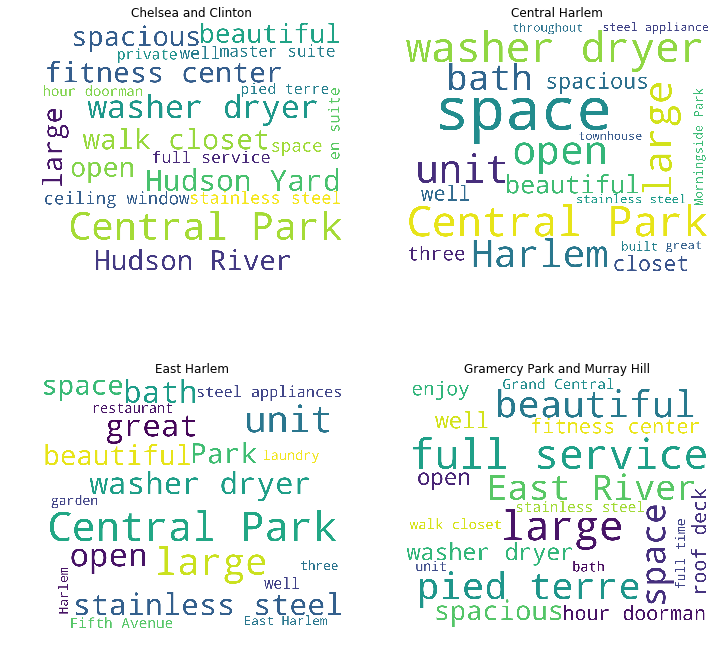

In [67]:
#Show the world cloud graph
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,4):
    text_string = remove_words(df_desciption[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i//2, i%2] 
    ax.set_title(df_desciption[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

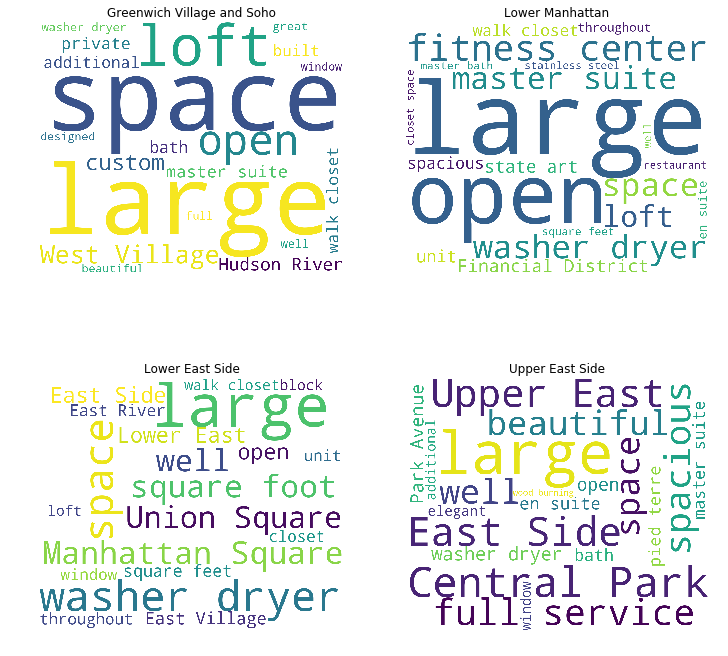

In [68]:
#Show the world cloud graph
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(4,8):
    text_string = remove_words(df_desciption[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[(i-4)//2, (i-4)%2] 
    ax.set_title(df_desciption[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

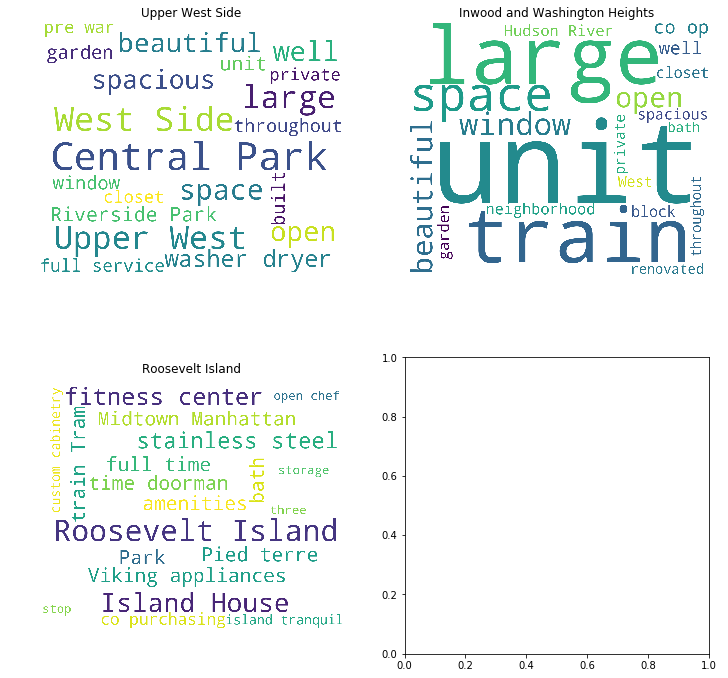

In [70]:
#Show the world cloud graph
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(8,len(df_desciption)):
    text_string = remove_words(df_desciption[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[(i-8)//2, (i-8)%2] 
    ax.set_title(df_desciption[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()